In [7]:
import numpy as np

def train_test_split(X, y, test_size=0.25, random_state=None):
    """
    Split the data into training and testing sets.

    Parameters:
    - X: array-like or DataFrame, shape (n_samples, n_features)
        The input data.
    - y: array-like, shape (n_samples,)
        The target variable.
    - test_size: float, optional (default=0.25)
        The proportion of the dataset to include in the test split.
    - random_state: int, optional (default=None)
        Seed for the random number generator to ensure reproducibility.

    Returns:
    - X_train, X_test, y_train, y_test: arrays
        Arrays representing the training and testing sets for features and target.
    """

    if random_state is not None:
        np.random.seed(random_state)

    # Number of samples
    n_samples = len(X)

    # Number of samples to include in the test split
    test_samples = int(test_size * n_samples)

    # Generate random indices for the test set
    test_indices = np.random.choice(n_samples, size=test_samples, replace=False)

    # Create boolean mask for the test set
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[test_indices] = True

    # Split the data into training and testing sets
    X_train, X_test = X[~test_mask], X[test_mask]
    y_train, y_test = y[~test_mask], y[test_mask]

    return X_train, X_test, y_train, y_test

In [28]:
import numpy as np

def roc_curve(y_true, y_scores):
    """
    Generate points for the ROC curve.

    Parameters:
    - y_true: True labels (NumPy array)
    - y_scores: Predicted scores (NumPy array)

    Returns:
    - fpr: False Positive Rate array
    - tpr: True Positive Rate array
    - thresholds: Thresholds array
    """
    # Combine true labels and scores into a single array
    data = np.column_stack((y_true, y_scores))

    # Sort data by predicted scores in descending order
    sorted_data = data[data[:, 1].argsort()[::-1]]

    # Initialize variables
    num_positive = np.sum(y_true == 1)
    num_negative = np.sum(y_true == 0)
    tpr = []
    fpr = []
    thresholds = []

    # Loop through sorted data to calculate TPR and FPR
    tp_count = 0
    fp_count = 0

    for i in range(len(sorted_data)):
        if sorted_data[i, 0] == 1:
            tp_count += 1
        else:
            fp_count += 1

        tpr.append(tp_count / num_positive)
        fpr.append(fp_count / num_negative)
        thresholds.append(sorted_data[i, 1])

    # Convert lists to NumPy arrays
    tpr = np.array(tpr)
    fpr = np.array(fpr)
    thresholds = np.array(thresholds)
    return fpr, tpr, thresholds

# Example usage:
# Example data (replace with your actual data)
#y_true = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])
#y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])

# Calculate ROC curve
#fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Plot ROC curve
#plt.figure(figsize=(8, 8))
#plt.plot(fpr, tpr, label='ROC Curve')
#plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
#plt.legend()
#plt.show()

THIS IS MY ROC CURVE!!!


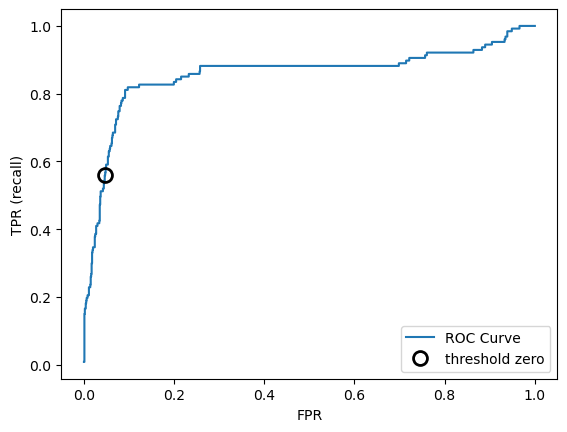

In [29]:

from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_blobs
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)